In [12]:
import pandas as pd
import pickle
from data_structure import OD_tree, GeoSpine
import os
import matplotlib.pyplot as plt
import numpy as np

In [13]:
type = "random"  # "binary" or "random"
density = "sparse"  # "sparse" or "dense" or "complete"

In [14]:
folder_path = f"../data/synthetic_{type}/{density}/"
with open(os.path.join(folder_path, "structure/geo_spine.pickle"), "rb") as f:
    geo_spine = pickle.load(f)

# upload csv data
df = pd.read_csv(os.path.join(folder_path, "data.csv"))

spine = GeoSpine(geo_spine)
tree = OD_tree(df, spine)

# Histogram

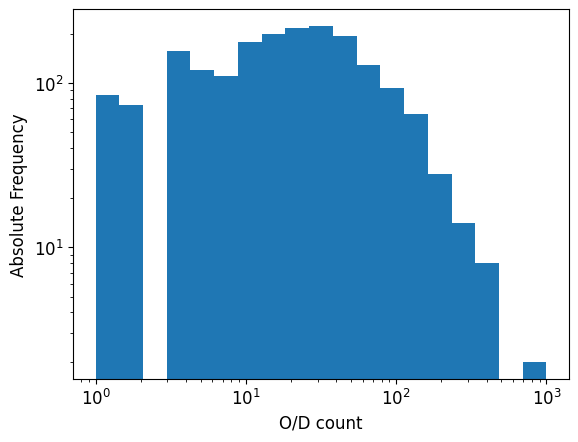

In [15]:
tree_level = tree.depth
geo_level = int(tree_level / 2)
data = tree.get_data_at_level(tree_level)
# plot histogram
x_values = data["COUNT"].values
log_bins = np.logspace(np.log10(x_values.min()), np.log10(x_values.max()), num=20)

# Crea l'istogramma con scala logaritmica
plt.hist(x_values, bins=log_bins, density=False)

# Imposta la scala logaritmica per l'asse x
plt.xscale('log')
plt.yscale('log')
plt.xlabel("O/D count", fontsize=12)
plt.ylabel("Absolute Frequency", fontsize=12)
# change size of the ticks of the axes
plt.tick_params(axis='both', which='major', labelsize=12)

# # save the plot
# folder = "../plots/Italy/additional"
# if not os.path.exists(folder):
#     os.makedirs(folder)
# plt.savefig(f"{folder}/histogram_OD_{geo_level}.png")
plt.show()

# Size of dataset

In [16]:
types = ["random", "binary"]
densities = ["sparse", "dense", "complete"]
for type in types:
    for density in densities:
        folder_path = f"../data/synthetic_{type}/{density}/"
        with open(os.path.join(folder_path, "structure/geo_spine.pickle"), "rb") as f:
            geo_spine = pickle.load(f)

        # upload csv data
        df = pd.read_csv(os.path.join(folder_path, "data.csv"))

        # spine = GeoSpine(geo_spine)
        # tree = OD_tree(df, spine)
        n_user = df["COUNT"].sum()
        print(f"Type: {type}, Density: {density}, number of users: {n_user}, number of rows: {df.shape[0]}")

Type: random, Density: sparse, number of users: 67840, number of rows: 1892
Type: random, Density: dense, number of users: 1003943, number of rows: 94612
Type: random, Density: complete, number of users: 2019580, number of rows: 189225
Type: binary, Density: sparse, number of users: 23302, number of rows: 655
Type: binary, Density: dense, number of users: 734688, number of rows: 32768
Type: binary, Density: complete, number of users: 1051271, number of rows: 65536
